In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d atharvaingle/crop-recommendation-dataset

  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 44.2MB/s]


In [3]:
! unzip /content/crop-recommendation-dataset.zip

Archive:  /content/crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tqdm 
import seaborn as sn
from sklearn import metrics, preprocessing, model_selection

# Read the Data

In [5]:
dataset = pd.read_csv('/content/Crop_recommendation.csv')
dataset 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
# show the dataset information 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Preprocessing the Dataset 

In [7]:
# drop the na values 
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 154.7+ KB


In [8]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d5995c710>,
      dtype=object)

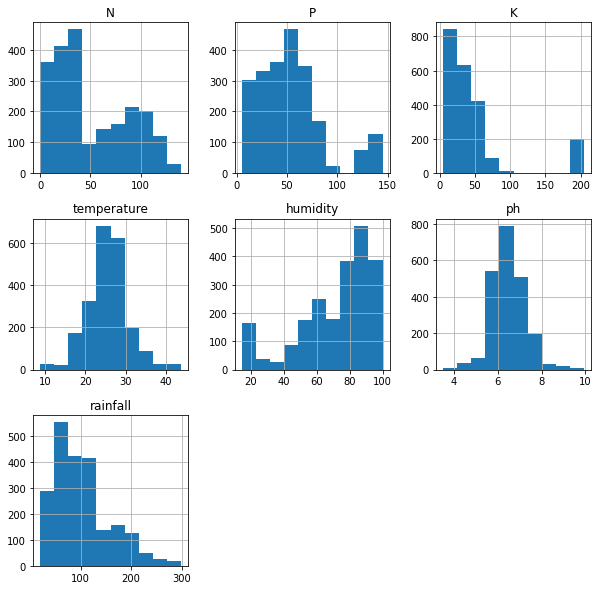

In [9]:
# plot the histogram 
dataset.hist(figsize=(10,10))

In [10]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [12]:
dataset 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [13]:
dataset .iloc[0]

N                      90
P                      42
K                      43
temperature     20.879744
humidity        82.002744
ph               6.502985
rainfall       202.935536
label                rice
Name: 0, dtype: object

In [14]:

dataset.label=dataset.label.factorize()[0]

In [15]:
# split the data to features and labels 
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]


In [16]:
# scale the feature values between 0,1
min_max_preprocess =preprocessing.StandardScaler()
min_max_preprocess.fit(x)
x_norm=min_max_preprocess.transform(x)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d590a4350>,
      dtype=object)

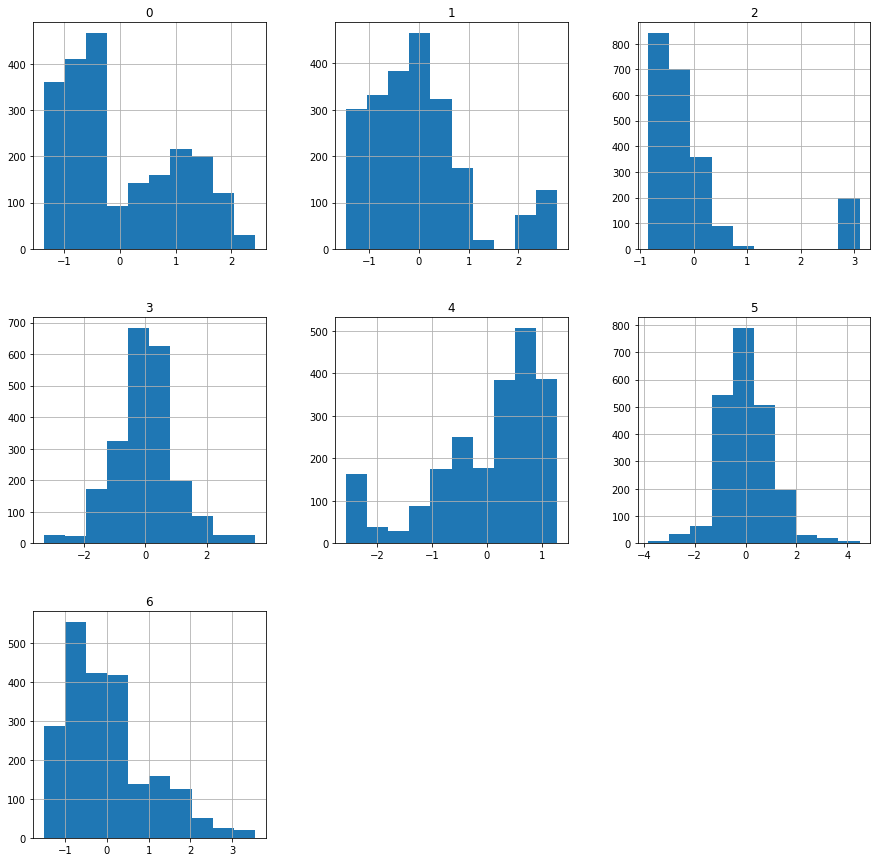

In [17]:
pd.DataFrame(x_norm).hist(figsize=(15,15))

(array([300., 200., 200., 200., 200., 200., 200., 200., 200., 300.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

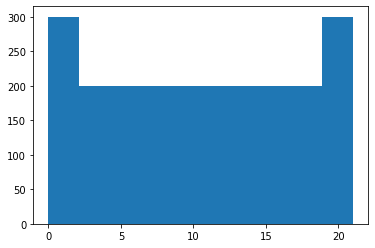

In [18]:
plt.hist(y)

In [19]:
len(set(y))

22

# Spilt the Data to Train & Test 

In [20]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_norm,y,test_size=0.2,random_state=42,stratify=y)

In [21]:
y_train = tf.one_hot(y_train,depth=len(set(y)))
y_test = tf.one_hot(y_test,depth=len(set(y)))

# Create the Data Pipeline

In [22]:
# creat the data pipeline
def data_pipeline(x,y,batch_size=32):
    # insert the data to the data pipeline
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.shuffle(50000)# shuffle the data
    data=data.batch(batch_size)# creat the batch
    data=data.prefetch(tf.data.AUTOTUNE)# run the data processing and training in parallel 
    return data

In [23]:
# create the train pipeline 
train_dataset=data_pipeline(x_train,y_train)
# create the test pipeline
test_dataset=data_pipeline(x_test,y_test)

In [24]:
# get the first batch of data from the train pipeline 
for x,y in train_dataset.take(1):
    print(x)
    print(y)

tf.Tensor(
[[-7.19387128e-01 -6.17456774e-01 -2.59676560e-01  7.20496815e-01
  -7.48433751e-01 -1.45602172e+00 -4.92308432e-02]
 [-6.91382089e-02  2.61907086e-01 -6.54649203e-01 -4.94573934e-02
  -2.17613594e-01  1.38175784e+00 -6.85166661e-01]
 [ 2.55986250e-01 -2.23259182e-01  9.57988193e-02 -2.23212761e-01
   9.65946656e-01  3.77988589e-01  1.45647445e+00]
 [-9.90324177e-01  4.74167328e-01 -5.75654674e-01 -9.20467978e-01
  -3.50446024e-01  9.95106128e-01 -9.29365913e-01]
 [-7.73574537e-01  1.93239519e-02 -5.55906042e-01  5.81767389e-01
   5.46133191e-01  2.84771227e-01 -1.13658212e+00]
 [-2.85887848e-01  5.04490219e-01 -5.55906042e-01  1.22171647e+00
  -1.18829297e+00 -1.09334688e+00  7.93007149e-01]
 [ 3.37267365e-01  1.40615519e-01 -2.26929737e-02  2.39856457e-01
   8.65817693e-01  5.10058393e-01  7.49864714e-01]
 [-4.48450078e-01  1.70938410e-01 -5.95403306e-01 -4.41713589e-01
  -2.22352929e+00 -9.37449261e-01 -2.87458569e-01]
 [-6.92293423e-01 -1.40585196e+00 -2.59676560e-01  5.

# Model

In [25]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model,self).__init__()
        self.D1=tf.keras.layers.Dense(32,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L2())
        self.D2=tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L2())
        self.D3=tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L2())
        self.D4=tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L2())
        self.out=tf.keras.layers.Dense(22,activation=tf.nn.softmax)
    def call(self,x ) :
        x=self.D1(x)
        x=self.D2(x)
        x=self.D3(x)
        x=self.D4(x)
        out = self.out(x)
        return out


In [26]:
model=Model()
model.build(input_shape=(None,7))

In [27]:
# compile the model an using adam optimizer with Categorical crossentropy cost function
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=['acc'],
)
# train the model with batch_size=32,for 100 epochs
model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
55/55 [==============================] - 4s 6ms/step - loss: 4.3942 - acc: 0.3398 - val_loss: 3.3584 - val_acc: 0.5227
Epoch 2/20
55/55 [==============================] - 0s 4ms/step - loss: 2.5678 - acc: 0.6807 - val_loss: 2.0289 - val_acc: 0.8364
Epoch 3/20
55/55 [==============================] - 0s 3ms/step - loss: 1.8042 - acc: 0.8352 - val_loss: 1.6321 - val_acc: 0.8455
Epoch 4/20
55/55 [==============================] - 0s 3ms/step - loss: 1.4998 - acc: 0.8852 - val_loss: 1.3954 - val_acc: 0.9182
Epoch 5/20
55/55 [==============================] - 0s 3ms/step - loss: 1.3122 - acc: 0.9239 - val_loss: 1.2653 - val_acc: 0.9136
Epoch 6/20
55/55 [==============================] - 0s 3ms/step - loss: 1.1894 - acc: 0.9386 - val_loss: 1.1266 - val_acc: 0.9500
Epoch 7/20
55/55 [==============================] - 0s 4ms/step - loss: 1.0899 - acc: 0.9420 - val_loss: 1.0527 - val_acc: 0.9477
Epoch 8/20
55/55 [==============================] - 0s 3ms/step - loss: 1.0213 - acc: 0.95

# Model Evaluation 

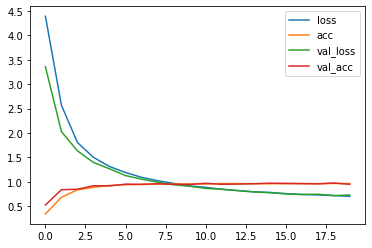

In [28]:
pd.DataFrame(model.history.history).plot()

In [29]:
preds=np.array([])
ys=np.array([])
for x,y in tqdm.tqdm(test_dataset):
    pred = model.predict(x)
    pred = np.argmax(pred,axis=-1)
    preds=np.append(preds,pred)
    y = np.argmax(y, axis=-1)
    ys = np.append(ys,y)
    
    
    
    

100%|██████████| 14/14 [00:00<00:00, 22.91it/s]


accuracy_score: 0.9477272727272728
precision_score: 0.9567826771384084
recall_score: 0.9477272727272728
f1_score: 0.9452738390268752


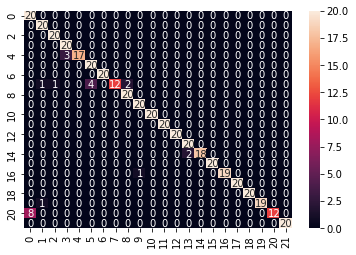

In [30]:
accuracy_score=metrics.accuracy_score(y_true=ys,y_pred=preds)
precision_score=metrics.precision_score(ys,preds, average='weighted')
recall_score=metrics.recall_score(ys,preds, average='weighted')
f1_score=metrics.f1_score(ys,preds, average='weighted')
confion_metrix=metrics.confusion_matrix(ys,preds)
print('accuracy_score:',accuracy_score)
print('precision_score:',precision_score)
print('recall_score:',recall_score)
print('f1_score:',f1_score)

sn.heatmap(confion_metrix,annot=True)
